In [45]:
# solucion del sistema masa resorte amortiguador con metodos numericos
# importar librerias

import numpy as np
import matplotlib.pyplot as plt

# constantes del sistema
m = 2.5
c = 1
k = 1.2

# discretiazacion del tiempo
p1 = -c/(2*m)+(1*pow(c/(2*m),2)-k/m)**0.5
p2 = -c/(2*m)-(1*pow(c/(2*m),2)-k/m)**0.5

print(p1,p2)



(-0.19999999999999998+0.6633249580710799j) (-0.20000000000000004-0.6633249580710799j)


In [46]:
tau1= 1/p2
print(tau1) 

tau2 = 1/p1
print(tau2)

(-0.41666666666666674+1.3819269959814164j)
(-0.41666666666666674-1.3819269959814167j)


In [47]:
# paso de tiempo
h = 0.4
tfin = 12.6

n = int (tfin/h + 1 )# cantidad de datos de la simulacion

# Variables de la simulacion t y y1 y y2
t = np.zeros(n)
y1 = np.zeros(n)
y2 = np.zeros(n)

In [48]:
# Funciones a dy1 = f1(t,y1,y2) y dy2 = f2(t,y1,y2)
def f1(t,y1,y2):
    return y2
def f2(t,y1,y2):
    sal = -k/m*y1 - c/m * y2
    return sal

In [49]:
# programa de euler
# condiciones iniciales
y1[0] = 0.5
y2[0] = 0

for i in np.arange(1,n):
    y1[i] = y1[i-1] + h * f1(t[i-1],y1[i-1],y2[i-1])
    y2[i] = y2[i-1] + h * f2(t[i-1],y1[i-1],y2[i-1])
    t[i] = t[i-1] + h

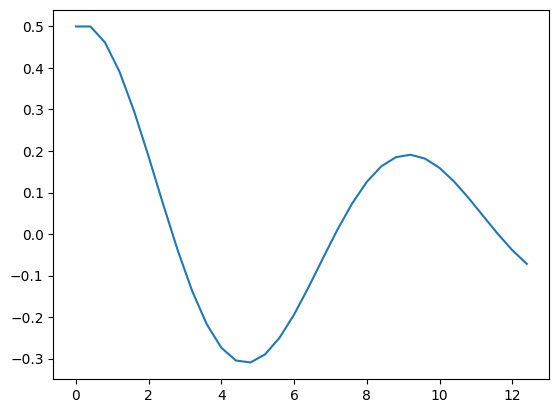

In [50]:
plt.plot(t,y1)

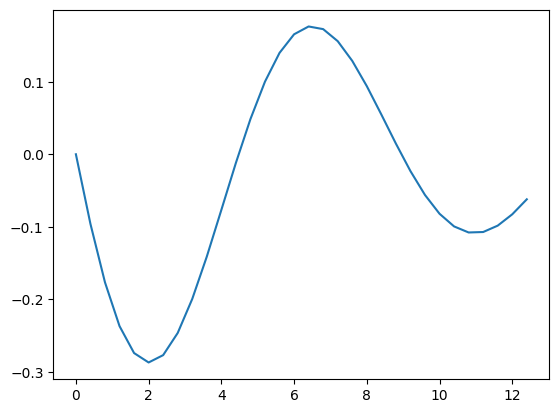

In [51]:
plt.plot(t,y2)

In [52]:
# RK4

t_rk = np.zeros(n)
y1_rk = np.zeros(n)
y2_rk = np.zeros(n)

# condiciones iniciales
y1_rk[0] = 0.5
y2_rk[0] = 0


# iteraciones RK
for i in np.arange(1,n):
    k11 = f1(t_rk[i-1],y1_rk[i-1],y2_rk[i-1])
    k12 = f2(t_rk[i-1],y1_rk[i-1],y2_rk[i-1])
    ttemp = t_rk[i-1] + 1/2*h
    y1temp = y1_rk[i-1] + 1/2*h*k11
    y2temp = y2_rk[i-1] + 1/2*h*k12
    k21 = f1(ttemp,y1temp,y2temp)
    k22 = f2(ttemp,y1temp,y2temp)
    
    ttemp = t_rk[i-1] + 1/2*h
    y1temp = y1_rk[i-1] + 1/2*h*k21
    y2temp = y2_rk[i-1] + 1/2*h*k22
    k31 = f1(ttemp,y1temp,y2temp)
    k32 = f2(ttemp,y1temp,y2temp)

    ttemp = t_rk[i-1] + h
    y1temp = y1_rk[i-1] + h*k31
    y2temp = y2_rk[i-1] + h*k32
    k41 = f1(ttemp,y1temp,y2temp)
    k42 = f2(ttemp,y1temp,y2temp)

    t_rk[i] = t_rk[i-1] + h
    y1_rk[i] = y1_rk[i-1] + h * 1/6 * (k11 + 2*k21 + 2*k31 + k41)
    y2_rk[i] = y2_rk[i-1] + h * 1/6 * (k12 + 2*k22 + 2*k32 + k42)

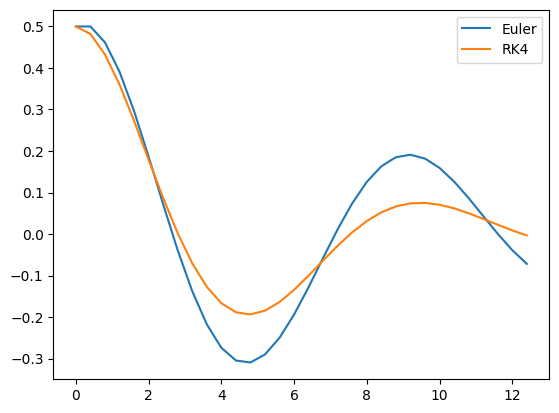

In [53]:
plt.plot(t,y1,t_rk,y1_rk)
plt.legend(["Euler","RK4"])

In [54]:
A = np.array([[0,1],[-k/m,-c/m]])
A

array([[ 0.  ,  1.  ],
       [-0.48, -0.4 ]])

In [55]:
import scipy.linalg 
scipy.linalg.eig(A)

(array([-0.2+0.66332496j, -0.2-0.66332496j]),
 array([[ 0.82199494+0.j        ,  0.82199494-0.j        ],
        [-0.16439899+0.54524976j, -0.16439899-0.54524976j]]))